Usage of Operations
===================

This notebook serves to show how operations provided by the toolbox can be applied.
For this purpose, the following aspects are covered:

* Access to ESA CCI Ozone and Cloud data (Atmosphere Mole Content of Ozone and Cloud Cover)
* Geometric adjustments (coregistration)
* Spatial (point, polygon) and temporal subsetting
* Visualisation of time series


Ingest data and create datasets
-------------------------------

In [1]:
from IPython.display import JSON

from xcube.core.store import new_data_store

import esa_climate_toolbox.ops as ops

from esa_climate_toolbox.core import get_op
from esa_climate_toolbox.core import get_op_meta_info
from esa_climate_toolbox.util.monitor import ConsoleMonitor

First, read in the ESA Climate Data Centre Data Store.

In [2]:
data_store = new_data_store('esa-climate-data-centre')

Open an ozone dataset (see Notebook 1-ECT_General_Data_Access to find which options you have).

In [3]:
ozone_ds = data_store.open_data('esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1',
                               time_range=['2007-01-01', '2007-06-30'])
ozone_ds

<xarray.Dataset>
Dimensions:           (time: 6, layers: 16, lat: 180, lon: 360,
                       air_pressure: 17, bnds: 2)
Coordinates:
  * air_pressure      (air_pressure) float32 1.013e+03 446.0 196.4 ... 0.05 0.01
  * lat               (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * layers            (layers) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * lon               (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time              (time) datetime64[ns] 2007-01-16T12:00:00 ... 2007-06-16
    time_bnds         (time, bnds) datetime64[ns] dask.array<chunksize=(6, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    O3_du             (time, layers, lat, lon) float32 dask.array<chunksize=(1, 16, 180, 360), meta=np.ndarray>
    O3_du_tot         (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    O3_ndens          (time, air_pressure, lat, lon) float32 dask.array<chunksize=(1, 17, 180, 360), meta=np.ndarray>
    O3_vmr            (time, air_pressure, lat, lon) float32 dask.array<chunksize=(1, 17, 180, 360), meta=np.ndarray>
    O3e_du            (time, layers, lat, lon) float32 dask.array<chunksize=(1, 16, 180, 360), meta=np.ndarray>
    O3e_du_tot        (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    O3e_ndens         (time, air_pressure, lat, lon) float32 dask.array<chunksize=(1, 17, 180, 360), meta=np.ndarray>
    O3e_vmr           (time, air_pressure, lat, lon) float32 dask.array<chunksize=(1, 17, 180, 360), meta=np.ndarray>
    surface_pressure  (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.OZONE.mon.L3.NP.multi-sensor.multi-platfo...
    date_created:            2023-11-15T18:04:11.890043
    processing_level:        L3
    time_coverage_start:     2007-01-01T00:00:00
    time_coverage_end:       2007-07-01T00:00:00
    time_coverage_duration:  P181DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

Open a cloud dataset next.

In [5]:
cloud_ds = data_store.open_data('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.ATSR2-AATSR.3-0.r1',
                               time_range=['2007-01-01', '2007-06-30'])
cloud_ds

<xarray.Dataset>
Dimensions:                       (time: 6, lat: 360, lon: 720, hist_phase: 2,
                                   hist1d_cer_bin_centre: 11,
                                   hist1d_cer_bin_border: 12,
                                   hist1d_cla_vis006_bin_centre: 13,
                                   hist1d_cla_vis006_bin_border: 14,
                                   hist1d_cla_vis008_bin_centre: 13,
                                   ...
                                   hist1d_cwp_bin_centre: 14,
                                   hist1d_cwp_bin_border: 15,
                                   hist2d_cot_bin_border: 14,
                                   hist2d_cot_bin_centre: 13,
                                   hist2d_ctp_bin_centre: 15,
                                   hist2d_ctp_bin_border: 16, bnds: 2)
Coordinates: (12/23)
  * hist1d_cer_bin_border         (hist1d_cer_bin_border) float32 0.0 ... 80.0
  * hist1d_cer_bin_centre         (hist1d_cer_bin_centre) float32 1.5 ... 70.0
  * hist1d_cla_vis006_bin_border  (hist1d_cla_vis006_bin_border) float32 0.0 ...
  * hist1d_cla_vis006_bin_centre  (hist1d_cla_vis006_bin_centre) float32 0.05...
  * hist1d_cla_vis008_bin_border  (hist1d_cla_vis008_bin_border) float32 0.0 ...
  * hist1d_cla_vis008_bin_centre  (hist1d_cla_vis008_bin_centre) float32 0.05...
    ...                            ...
  * hist2d_ctp_bin_centre         (hist2d_ctp_bin_centre) float32 45.5 ... 1....
  * hist_phase                    (hist_phase) int8 0 1
  * lat                           (lat) float32 -89.75 -89.25 ... 89.25 89.75
  * lon                           (lon) float32 -179.8 -179.2 ... 179.2 179.8
  * time                          (time) datetime64[ns] 2007-01-16T12:00:00 ....
    time_bnds                     (time, bnds) datetime64[ns] dask.array<chunksize=(6, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables: (12/182)
    boa_lwdn                      (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    boa_lwdn_clr                  (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    boa_lwup                      (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    boa_lwup_clr                  (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    boa_swdn                      (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    boa_swdn_clr                  (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    ...                            ...
    toa_swdn                      (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    toa_swup                      (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    toa_swup_clr                  (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    toa_swup_hig                  (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    toa_swup_low                  (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    toa_swup_mid                  (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.m...
    date_created:            2023-11-15T18:05:23.247685
    processing_level:        L3C
    time_coverage_start:     2007-01-01T00:00:00
    time_coverage_end:       2007-07-01T00:00:00
    time_coverage_duration:  P181DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

Filter datasets to select the desired variables
-----------------------------------------------

The datasets are rather large, so we opt to make datasets that have only the variable we are interested in. The ``select_var`` op may be used for that.

In [6]:
JSON(get_op_meta_info('select_var'))

<IPython.core.display.JSON object>

In [7]:
svar_op = get_op('select_var')

We choose the variable ``cfc`` (cloud area fraction) from the cloud dataset ...

In [8]:
cfc_ds = svar_op(ds=cloud_ds, var='cfc')
cfc_ds

<xarray.Dataset>
Dimensions:                       (time: 6, lat: 360, lon: 720,
                                   hist1d_cer_bin_border: 12,
                                   hist1d_cer_bin_centre: 11,
                                   hist1d_cla_vis006_bin_border: 14,
                                   hist1d_cla_vis006_bin_centre: 13,
                                   hist1d_cla_vis008_bin_border: 14,
                                   ...
                                   hist1d_cwp_bin_centre: 14,
                                   hist2d_cot_bin_border: 14,
                                   hist2d_cot_bin_centre: 13,
                                   hist2d_ctp_bin_border: 16,
                                   hist2d_ctp_bin_centre: 15, hist_phase: 2,
                                   bnds: 2)
Coordinates: (12/23)
  * hist1d_cer_bin_border         (hist1d_cer_bin_border) float32 0.0 ... 80.0
  * hist1d_cer_bin_centre         (hist1d_cer_bin_centre) float32 1.5 ... 70.0
  * hist1d_cla_vis006_bin_border  (hist1d_cla_vis006_bin_border) float32 0.0 ...
  * hist1d_cla_vis006_bin_centre  (hist1d_cla_vis006_bin_centre) float32 0.05...
  * hist1d_cla_vis008_bin_border  (hist1d_cla_vis008_bin_border) float32 0.0 ...
  * hist1d_cla_vis008_bin_centre  (hist1d_cla_vis008_bin_centre) float32 0.05...
    ...                            ...
  * hist2d_ctp_bin_centre         (hist2d_ctp_bin_centre) float32 45.5 ... 1....
  * hist_phase                    (hist_phase) int8 0 1
  * lat                           (lat) float32 -89.75 -89.25 ... 89.25 89.75
  * lon                           (lon) float32 -179.8 -179.2 ... 179.2 179.8
  * time                          (time) datetime64[ns] 2007-01-16T12:00:00 ....
    time_bnds                     (time, bnds) datetime64[ns] dask.array<chunksize=(6, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    cfc                           (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.m...
    date_created:            2023-11-15T18:05:23.247685
    processing_level:        L3C
    time_coverage_start:     2007-01-01T00:00:00
    time_coverage_end:       2007-07-01T00:00:00
    time_coverage_duration:  P181DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

... and ``O3_du_tot`` (the atmosphere mole content of ozone) from the ozone dataset.

In [9]:
ozone_tot_ds = svar_op(ds=ozone_ds, var='O3_du_tot')
ozone_tot_ds

<xarray.Dataset>
Dimensions:       (time: 6, lat: 180, lon: 360, air_pressure: 17, layers: 16,
                   bnds: 2)
Coordinates:
  * air_pressure  (air_pressure) float32 1.013e+03 446.0 196.4 ... 0.05 0.01
  * lat           (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * layers        (layers) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * lon           (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time          (time) datetime64[ns] 2007-01-16T12:00:00 ... 2007-06-16
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(6, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    O3_du_tot     (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.OZONE.mon.L3.NP.multi-sensor.multi-platfo...
    date_created:            2023-11-15T18:04:11.890043
    processing_level:        L3
    time_coverage_start:     2007-01-01T00:00:00
    time_coverage_end:       2007-07-01T00:00:00
    time_coverage_duration:  P181DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

Plot the first time slices of the datasets

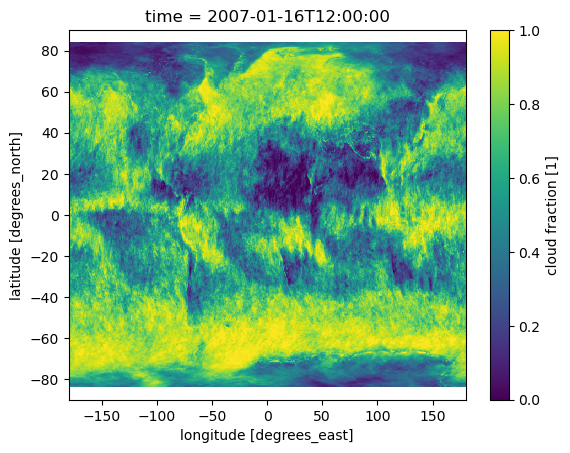

In [10]:
%matplotlib inline

cfc_ds.cfc.isel(time=0).plot()

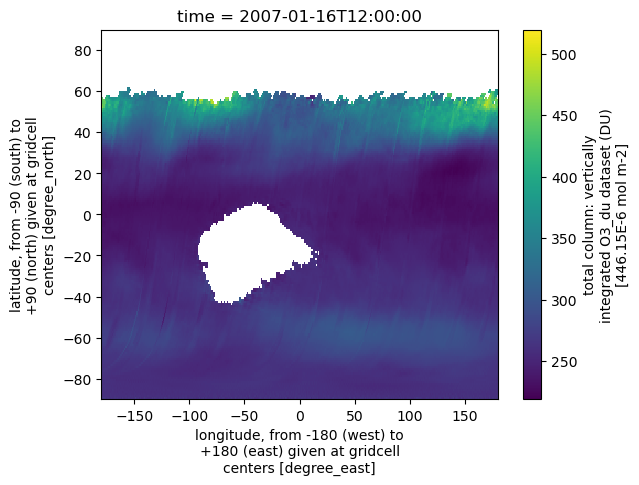

In [11]:
ozone_tot_ds.O3_du_tot.isel(time=0).plot()

Co-register datasets by resampling
----------------------------------

We see that though both datasets are global, they are in different spatial resolutions:

In [12]:
print(cfc_ds['cfc'].shape)
print(ozone_tot_ds['O3_du_tot'].shape)

(6, 360, 720)
(6, 180, 360)


To bring them to the same resolution, we use the ``coregister`` function.

In [13]:
JSON(get_op_meta_info('coregister'))

<IPython.core.display.JSON object>

In [14]:
coregister_op = get_op('coregister')

We get the cloud dataset to the resolution of the ozone dataset.

In [17]:
cfc_res_ds = coregister_op(ozone_tot_ds, cfc_ds)

Check the variable shapes again to see we were successful:

In [18]:
print(cfc_res_ds['cfc'].shape)
print(ozone_tot_ds['O3_du_tot'].shape)

(6, 180, 360)
(6, 180, 360)


And plot again:

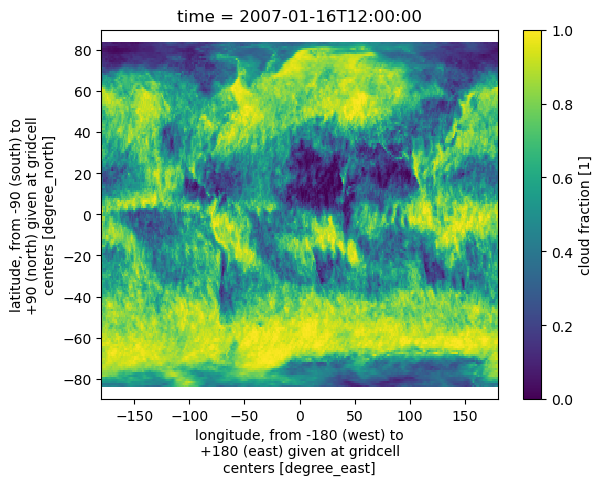

In [19]:
cfc_res_ds.cfc.isel(time=0).plot()

Select the desired spatial region
---------------------------------

We want to continue our analysis with a subset, say, Africa. For this we use ``subset_spatial``.

In [20]:
JSON(get_op_meta_info('subset_spatial'))

<IPython.core.display.JSON object>

In [21]:
subset_spatial_op = get_op('subset_spatial')

In [22]:
africa = '-20.0, -40.0, 60.0, 40.0'
# 'lon_min, lat_min, lon_max, lat_max'
cfc_africa_res_ds = subset_spatial_op(cfc_res_ds, africa)
ozone_tot_africa_ds = subset_spatial_op(ozone_tot_ds, africa)

This is a good time to compare the plots of the resampled subset and the original plot to see the effects of our work:

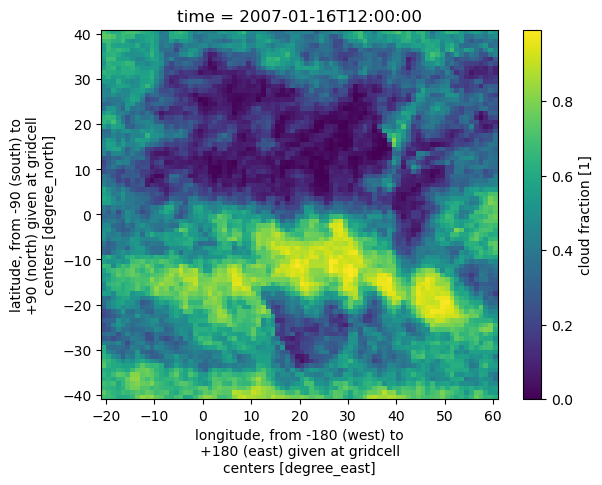

In [23]:
cfc_africa_res_ds.cfc.isel(time=0).plot()

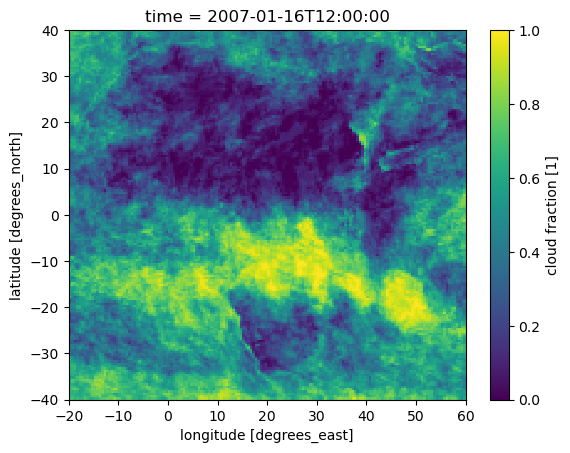

In [24]:
cfc_ds.cfc.isel(time=0).sel({'lat': slice(-40, 40), 'lon': slice(-20, 60)}).plot()

Select the desired temporal region
----------------------------------

We may also create a temporal subset:

In [25]:
JSON(get_op_meta_info('subset_temporal'))

<IPython.core.display.JSON object>

In [26]:
subset_temporal_op = get_op('subset_temporal')

In [27]:
cfc_africa_res_janmar_ds = subset_temporal_op(cfc_africa_res_ds, '2007-01-01, 2007-03-31')
ozone_tot_africa_janmar_ds = subset_temporal_op(ozone_tot_africa_ds, '2007-01-01, 2007-03-31')

In [28]:
print(cfc_africa_res_janmar_ds.time)

<xarray.DataArray 'time' (time: 3)>
array(['2007-01-16T12:00:00.000000000', '2007-02-15T00:00:00.000000000',
       '2007-03-16T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-01-16T12:00:00 ... 2007-03-16T12:00:00
Attributes:
    standard_name:  time
    bounds:         time_bnds


In [29]:
print(ozone_tot_africa_janmar_ds.time)

<xarray.DataArray 'time' (time: 3)>
array(['2007-01-16T12:00:00.000000000', '2007-02-15T00:00:00.000000000',
       '2007-03-16T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-01-16T12:00:00 ... 2007-03-16T12:00:00
Attributes:
    standard_name:  time
    bounds:         time_bnds


Retrieve and plot timeseries
----------------------------

Finally, we can create time series from these datasets. Operation ``tseries_point`` can be used to get a time series for a given point, ``tseries_mean`` will get the mean and standard deviation across the dataset.

In [30]:
JSON(get_op_meta_info('tseries_point'))

<IPython.core.display.JSON object>

In [31]:
JSON(get_op_meta_info('tseries_mean'))

<IPython.core.display.JSON object>

In [32]:
tseries_point_op = get_op('tseries_point')
tseries_mean_op = get_op('tseries_mean')

In [33]:
ozone_ts_point = tseries_point_op(ozone_tot_africa_janmar_ds, point='50, 50')
cfc_ts_point = tseries_point_op(cfc_africa_res_janmar_ds, point='50, 50')
ozone_ts_mean = tseries_mean_op(ozone_tot_africa_janmar_ds, var='O3_du_tot')
cfc_ts_mean = tseries_mean_op(cfc_africa_res_janmar_ds, var='cfc')

In [34]:
print(ozone_ts_mean)

<xarray.Dataset>
Dimensions:         (air_pressure: 17, lat: 82, layers: 16, lon: 82, time: 3,
                     bnds: 2)
Coordinates:
  * air_pressure    (air_pressure) float32 1.013e+03 446.0 196.4 ... 0.05 0.01
  * lat             (lat) float32 -40.5 -39.5 -38.5 -37.5 ... 38.5 39.5 40.5
  * layers          (layers) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * lon             (lon) float32 -20.5 -19.5 -18.5 -17.5 ... 58.5 59.5 60.5
  * time            (time) datetime64[ns] 2007-01-16T12:00:00 ... 2007-03-16T...
    time_bnds       (time, bnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    O3_du_tot_mean  (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    O3_du_tot_std   (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.7
    title:                      esacci.OZONE.mon.L3.NP.multi-sensor.multi-pla...
    date_created:            

In [35]:
print(cfc_ts_mean)

<xarray.Dataset>
Dimensions:   (lat: 82, lon: 82, time: 3)
Coordinates:
  * lat       (lat) float32 -40.5 -39.5 -38.5 -37.5 ... 37.5 38.5 39.5 40.5
  * lon       (lon) float32 -20.5 -19.5 -18.5 -17.5 ... 57.5 58.5 59.5 60.5
  * time      (time) datetime64[ns] 2007-01-16T12:00:00 ... 2007-03-16T12:00:00
Data variables:
    cfc_mean  (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    cfc_std   (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.7
    title:                      esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-senso...
    date_created:               2023-11-15T18:05:23.247685
    processing_level:           L3C
    time_coverage_start:        2007-01-16T12:00:00
    time_coverage_end:          2007-03-16T12:00:00
    ...                         ...
    geospatial_lat_min:         -41.0
    geospatial_lat_max:         41.0
    geospatial_lat_units:       degree_north
    geospatial_bounds_crs:      CRS84
 

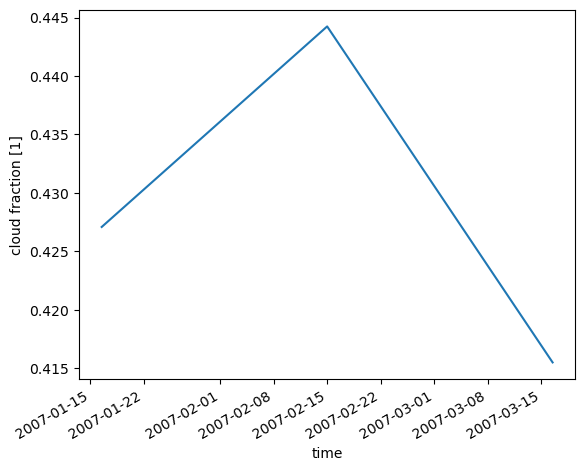

In [36]:
cfc_ts_mean.cfc_mean.plot()

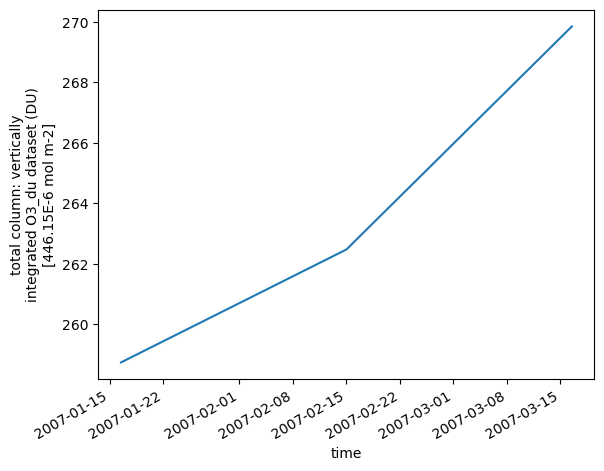

In [37]:
ozone_ts_mean.O3_du_tot_mean.plot()